# **Hierarchical Clustering - E-Commerce Data**

In [9]:
### Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
### Getting the UK E-Commerce Dataset

dataset = pd.read_csv('/content/drive/My Drive/MachineLearning/Hierarchical Clustering/E_Commerce_Data_4000_new.csv', nrows=3900, encoding='unicode_escape')

In [14]:
dataset.head(4000)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
3895,536732,21094,SET/6 RED SPOTTY PAPER PLATES,12,12-02-2010 12:47,0.85,15544.0,United Kingdom
3896,536732,21212,PACK OF 72 RETROSPOT CAKE CASES,24,12-02-2010 12:47,0.55,15544.0,United Kingdom
3897,536733,21206,STRAWBERRY HONEYCOMB GARLAND,12,12-02-2010 12:50,1.65,15738.0,United Kingdom
3898,536733,20974,12 PENCILS SMALL TUBE SKULL,24,12-02-2010 12:50,0.65,15738.0,United Kingdom


In [15]:
x = dataset.iloc[:, [3,5]].values # This code includes all rows of the table and consider index column 3 (Quantity) and index column 5 (Unit Price)

In [16]:
x

array([[ 6.  ,  2.55],
       [ 6.  ,  3.39],
       [ 8.  ,  2.75],
       ...,
       [12.  ,  1.65],
       [24.  ,  0.65],
       [16.  ,  1.65]])

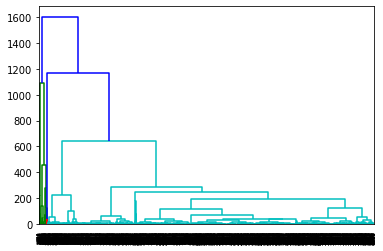

In [17]:
### Using dendrogram, we have to find the optimal number of clusters

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))

In [23]:
### Fitting hierarchical clustering to the dataset

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')

y_hc = hc.fit_predict(x)

In [24]:
y_hc

array([0, 0, 0, ..., 0, 4, 4])

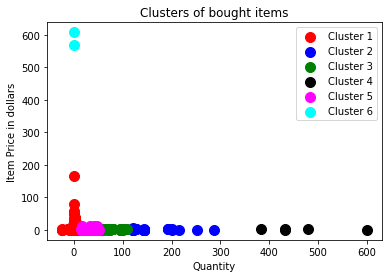

In [25]:
### Visualize clusters

plt.scatter(x[y_hc == 0,0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_hc == 1,0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_hc == 2,0], x[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_hc == 3,0], x[y_hc == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
plt.scatter(x[y_hc == 4,0], x[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(x[y_hc == 5,0], x[y_hc == 5, 1], s = 100, c = 'cyan', label = 'Cluster 6')
plt.title ('Clusters of bought items')
plt.xlabel ('Quantity')
plt.ylabel ('Item Price in dollars')
plt.legend()
plt.show()